In [28]:
import json
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

matplotlib.rcParams['font.family'] = 'DejaVu Serif'

def plot_fidelity_data(data, label1, label2):
    plt.figure(figsize=(12, 8))

    for operation in ['cnot', 'dcnot', 'cz', 'swap']:
        x = []
        y_fidelity = []
        
        for key, value in data.items():
            if operation in value:
                x.append(float(key))
                y_fidelity.append(value[operation]['fidelity'])
        
        xnew = np.linspace(min(x), max(x), 300) 
        spl = make_interp_spline(x, y_fidelity, k=2)  # type: BSpline
        power_smooth = spl(xnew)
        
        plt.plot(xnew, power_smooth, label=f"{operation} fidelity")
        plt.xlabel(label1, fontsize=32)
        plt.ylabel(label2, fontsize=32)
        ax = plt.gca()
        ax.set_facecolor('whitesmoke')
        plt.minorticks_on()
        plt.tick_params(axis='both', which='major', labelsize=32)
        plt.tick_params(axis='both', which='minor', labelsize=32)
        plt.legend(fontsize=32)
        plt.grid(True)

    plt.show()

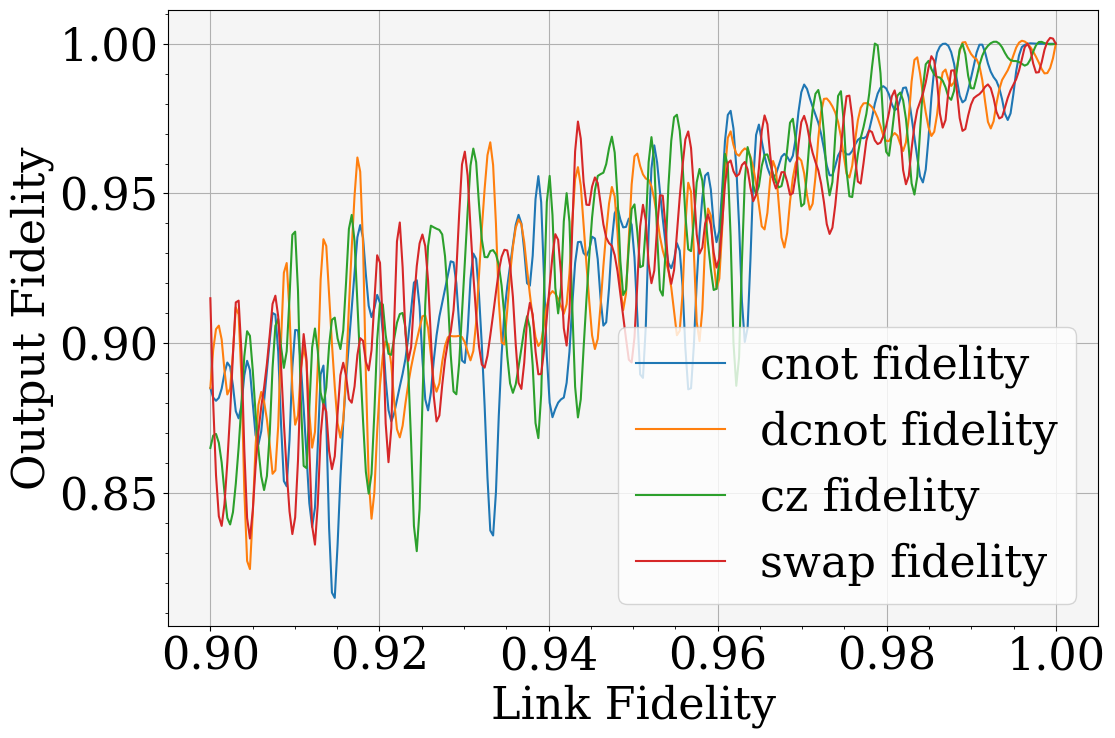

In [39]:
link_fidelity_data = None
with open("..//results//link_fidelity_results_2.json", "r") as file:
    link_fidelity_data = json.load(file)

label1 = "Link Fidelity"
label2 = "Output Fidelity"
plot_fidelity_data(link_fidelity_data, label1, label2)

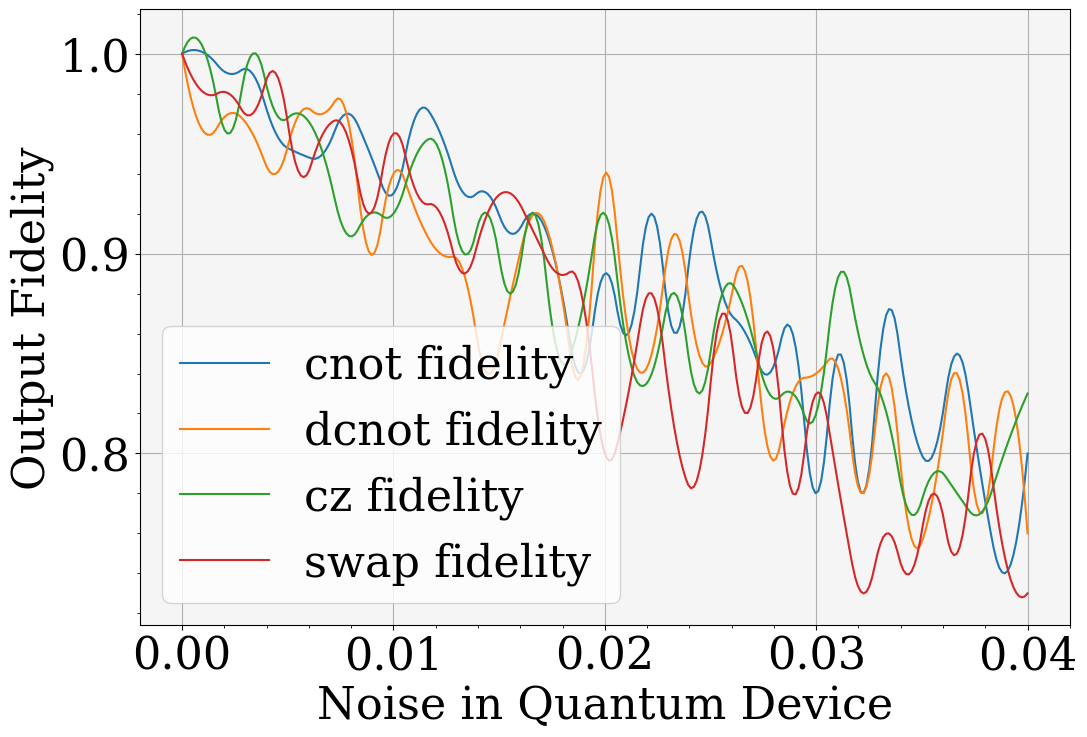

In [46]:
qdevice_noise_data = None
with open("..//results//qdevice_noise_results_2.json", "r") as file:
    qdevice_noise_data = json.load(file)

label1 = "Noise in Quantum Device"
label2 = "Output Fidelity"
plot_fidelity_data(qdevice_noise_data, label1, label2)

In [15]:
import json
import matplotlib
import matplotlib.pyplot as plt
import json
#print(matplotlib.font_manager.get_font_names())

matplotlib.rcParams['font.family'] = 'DejaVu Serif'

import numpy as np
from scipy.interpolate import griddata

def plot_3d_results(data, label1, label2, ticks):

    operation = 'cnot'
    values_x = []
    values_y = []
    values_z = []
        
    for key_x1, values_x1 in data.items():
        for key_x2, values_x2 in values_x1.items():
            values_x.append(float(key_x1))
            values_y.append(float(key_x2))
            values_z.append(float(values_x2[operation]['fidelity']))

    # Converting lists to numpy arrays for surface plot
    x = np.array(values_x)
    y = np.array(values_y)
    z = np.array(values_z)

    # Define grid
    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

    # Interpolate values
    z_interp = griddata((x, y), z, (x_grid, y_grid), method='linear')

    # Create contour plot
    fig = plt.figure(figsize=(12, 8))
    #ax = fig.add_subplot(111, projection='3d')
    plt.contourf(x_grid, y_grid, z_interp, cmap='viridis')
    cbar = plt.colorbar(label='Output Fidelity')  # Add colorbar indicating Z values
    cbar.ax.tick_params(labelsize=28)
    plt.xlabel(label1, fontsize=32)
    plt.ylabel(label2, fontsize=32)
    cbar.set_ticks(ticks)  # Set color bar ticks
    cbar.ax.yaxis.label.set_fontsize(32)
    plt.grid(True)
    plt.tick_params(labelsize=28)
    plt.show()

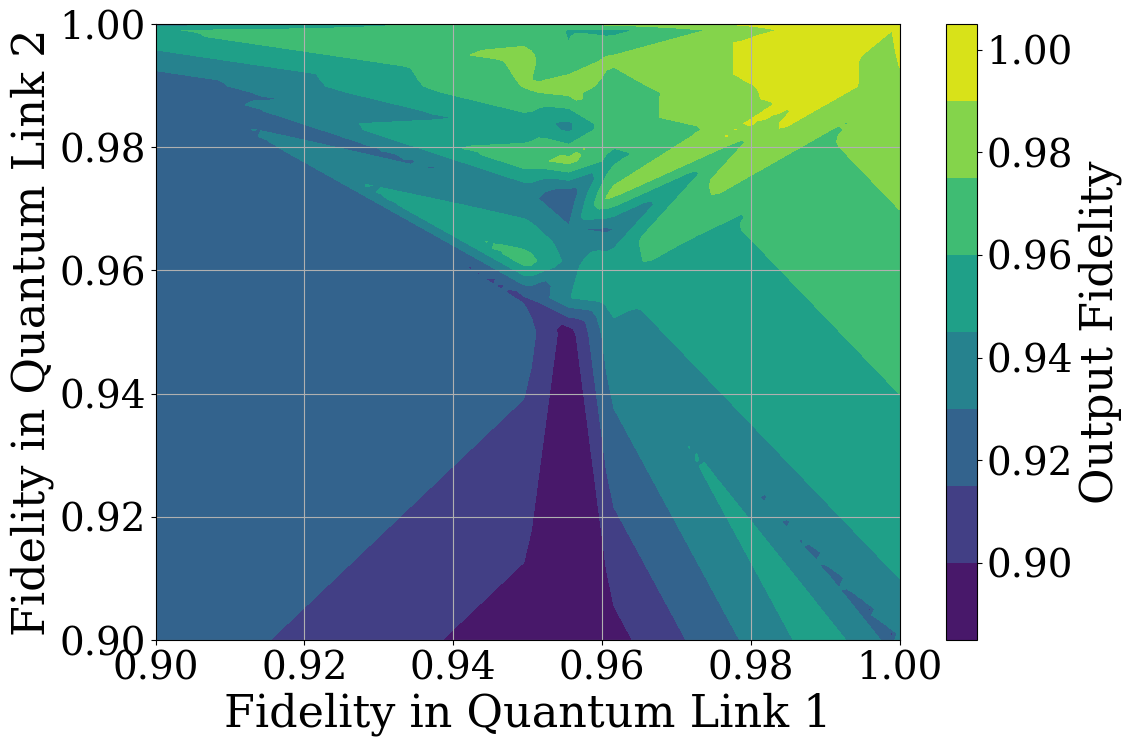

In [16]:
# Extracting data for 'cnot' operation from both datasets
link_fidelity_file = "..//results//link_fidelity_results_3.json"
with open(link_fidelity_file, "r") as file:
    link_fidelity_data = json.load(file)

label1 = 'Fidelity in Quantum Link 1'
label2 = 'Fidelity in Quantum Link 2'
ticks = np.arange(0.9, 1.01, 0.02)
plot_3d_results(link_fidelity_data, label1, label2, ticks)

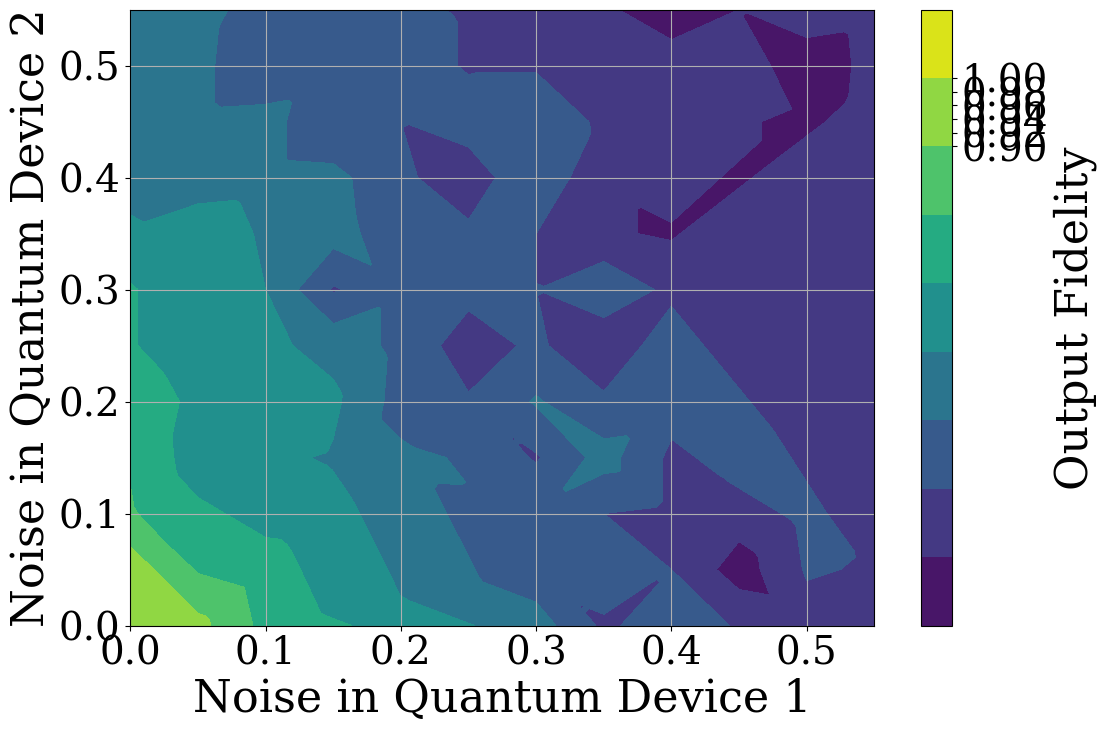

In [17]:
qdevice_noise_file = "..//results//qdevice_noise_results_three_nodes.json"
with open(qdevice_noise_file, "r") as file:
    qdevice_noise_data = json.load(file)

label1 = 'Noise in Quantum Device 1'
label2 = 'Noise in Quantum Device 2'
ticks = np.arange(0.9, 1.01, 0.02)
plot_3d_results(qdevice_noise_data, label1, label2, ticks)